## How to load a SXI fits file into sunpy

In [1]:
from __future__ import print_function, division
from datetime import timedelta
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# could use the sunpy colormaps instead
import sunpy.cm as scm

from matplotlib.colors import LogNorm
from pylab import figure, cm
%matplotlib inline

import astropy.time
from astropy.io import fits
from astropy import units as u

from sunpy import sun
import sunpy.map


/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/time/time.py:178: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if isinstance(time_string, pandas.tslib.Timestamp):
/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/map/mapbase.py:1604: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)
/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/wcs/wcs.py:232: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(rsun_meters ** 2 - x ** 2 - y ** 2)


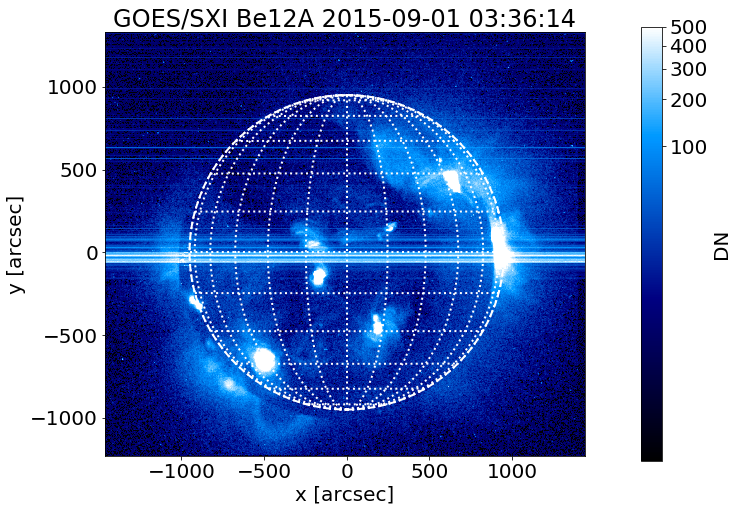

In [2]:
#### Need to do it manually as sunpy map doesn't understand the original fits file
infile='SXI_20150901_033615143_BA_15.FTS'

# Direct loading of the fits doesn't work
# sxi_map = sunpy.map.Map(infile)

# So manually load in the file and set the data and header
fitsin = fits.open(infile)
data=fitsin[0].data
hdr=fitsin[0].header

obs_time=hdr['date_obs']
# will also have to rotate so note the angle
rotang=hdr['crota1']*u.deg

# Have I got everything?
header = {'cdelt1': hdr['cdelt1'],'cdelt2': hdr['cdelt2'],
          'instrume':'SXI','detector':'SXI',
          'xcen':hdr['xcen'],'ycen':hdr['ycen'],'telescop':hdr['telescop'],
          'exptime':hdr['exptime'],'date_obs':hdr['date_obs'],'wavelnth':12,
          'crpix1':hdr['crpix1'],'crpix2':hdr['crpix2'],
          'HGLT_OBS': 0,'HGLN_OBS': 0,
          'RSUN_OBS': sun.solar_semidiameter_angular_size(obs_time).value,
          'RSUN_REF': sun.constants.radius.value,
          'DSUN_OBS': sun.sunearth_distance(obs_time).value*u.astrophys.au}
sxi_map = sunpy.map.Map(data, header)

sxi_map.plot_settings['cmap'] = scm.get_cmap('stereohi1')
sxi_map.plot_settings['norm'] = colors.PowerNorm(gamma=0.2,vmax=5e2)#,vmin=5,vmax=1000)
# sxi_map.plot_settings['norm'] = colors.LogNorm(2,5e2)# sxi_map.max())

matplotlib.rcParams['font.size'] = 20

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot()
sxi_map.plot()
sxi_map.draw_limb(color='white',linewidth=2,linestyle='dashed')  
sxi_map.draw_grid(color='white',linewidth=2,linestyle='dotted')

title_obsdate='{:.19}'.format('{:%Y-%m-%d %H:%M:%s}'.format(sxi_map.date))

ax.set_title('GOES/SXI Be12A '+title_obsdate)
ax.set_ylabel('y [arcsec]')
ax.set_xlabel('x [arcsec]')
plt.colorbar(fraction=0.04, pad=0.1,label='DN')
plt.show()


/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/map/mapbase.py:1599: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)
/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/map/mapbase.py:1604: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)
/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/wcs/wcs.py:232: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(rsun_meters ** 2 - x ** 2 - y ** 2)


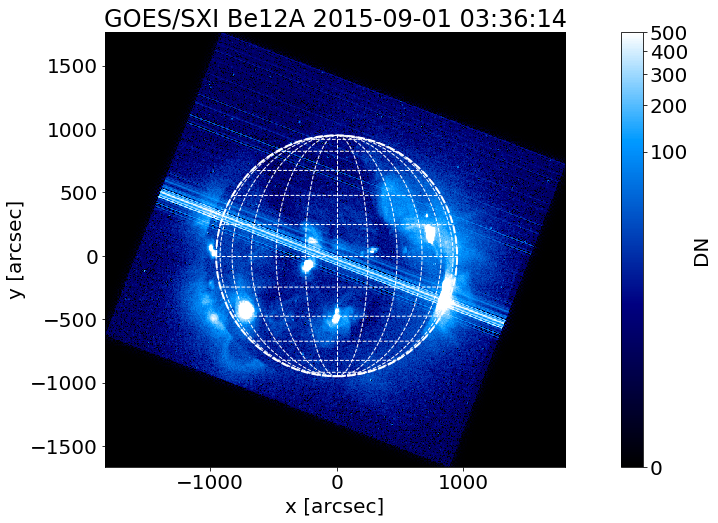

In [4]:
# Now lets rotate the image and see what it looks like
rsxi_map = sxi_map.rotate(rotang) 

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot()
rsxi_map.plot()
rsxi_map.draw_limb(color='white',linewidth=2,linestyle='dashed')  
rsxi_map.draw_grid(color='white',linewidth=1,linestyle='dashed')  

title_obsdate='{:.19}'.format('{:%Y-%m-%d %H:%M:%s}'.format(rsxi_map.date))

ax.set_title('GOES/SXI Be12A '+title_obsdate)
ax.set_ylabel('y [arcsec]')
ax.set_xlabel('x [arcsec]')
plt.colorbar(fraction=0.04, pad=0.1,label='DN')
plt.show()



/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/map/mapbase.py:1599: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)
/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/map/mapbase.py:1604: Warning: WCSAxes is installed but not being used. Plots may not have the expected behaviour.
  Warning)
/Users/iain/anaconda/lib/python3.6/site-packages/sunpy/wcs/wcs.py:232: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(rsun_meters ** 2 - x ** 2 - y ** 2)


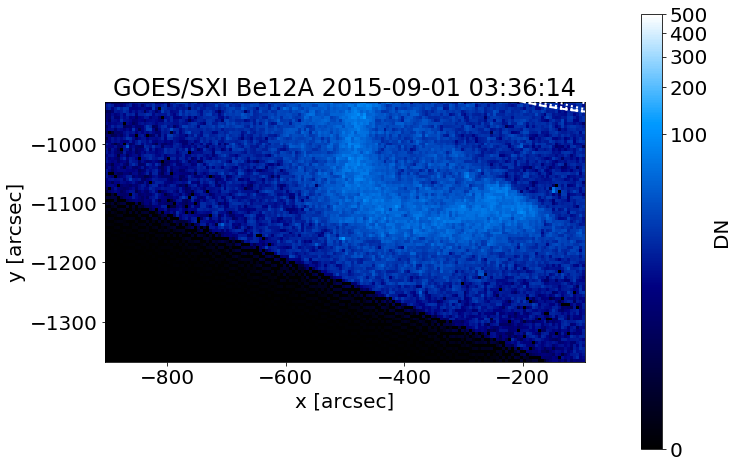

In [5]:
# Now plot our submap location of the rotated map
rangex = u.Quantity([-800*u.arcsec, -200 * u.arcsec])
rangey = u.Quantity([-1500 * u.arcsec, -800 * u.arcsec])
srsxi_map = rsxi_map.submap(rangex, rangey)

fig = plt.figure(figsize=(10, 8))
ax = plt.subplot()
srsxi_map.plot()
srsxi_map.draw_limb(color='white',linewidth=2,linestyle='dashed')   
srsxi_map.draw_grid(color='white',linewidth=2,linestyle='dotted')

title_obsdate='{:.19}'.format('{:%Y-%m-%d %H:%M:%s}'.format(srsxi_map.date))

ax.set_title('GOES/SXI Be12A '+title_obsdate)
ax.set_ylabel('y [arcsec]')
ax.set_xlabel('x [arcsec]')
plt.colorbar(fraction=0.04, pad=0.1,label='DN')
plt.show()

#### well that is not correct ;(